# Prouni 2005 - 2019 - Analise Explortória de dados

#### Nome do alunos:
Amanda Magalhães; Daniel Dias; Douglas Rocha; Karen Almeida; Rhayza Pinto

#### Descrição:
Neste notebook, realizaremos uma análise exploratória de um conjunto de dados do programa PROUNI (Programa Universidade para Todos) em formato CSV.

#### Dataset:
O conjunto de dados usado neste projeto consiste em informações referente ao Programa Universidade para Todos (PROUNI), uma iniciativa governamental brasileira que busca ampliar o acesso à educação superior por meio da concessão de bolsas de estudo parciais ou integrais em instituições de ensino privada.

#### Metodologia:
Inicialmente, procederemos uma preparação dos dados. Utilizaremos visualizações e técnicas de análise exploratória, nosso objetivo é entender e verificar padrões nos dados do programa PROUNI. A análise abrange aspectos como a distribuição de vagas, a diversidade de instituições de ensino, os campos de estudo predominantes, a evolução do programa PROUNI no decorrer dos anos, rackeamento de cursos por estados e outras variáveis. Por meio dessa abordagem, almejamos fornecer uma perspectiva sobre o impacto e a amplitude do programa PROUNI na educação superior em nosso país.

#### Resultados:
Ao final desta análise, teremos uma compreensão mais completa e detalhada do impacto do PROUNI no cenário da educação superior brasileira.

## Importando bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
import seaborn as sns

## Leitura do df

In [2]:
# Criando df
df = pd.read_csv('..\data\prouni_2005_2019_tratado.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,ano,universidade,tipo_bolsa,modalidade_ensino,curso,turno,sexo_beneficiario,raca_beneficiario,pcd,regiao,sigla_uf,municipio,idade
0,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,enfermagem,Integral,F,Branca,False,SUL,RS,santo angelo,18
1,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,servico social,Noturno,F,Parda,False,SUL,RS,frederico westphalen,19
2,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,servico social,Noturno,F,Parda,False,SUL,RS,frederico westphalen,21
3,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,ciencias da computacao,Noturno,M,Branca,False,SUL,RS,frederico westphalen,18
4,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,ciencias da computacao,Noturno,M,Amarela,False,SUL,RS,frederico westphalen,18


# Análise dos dados

Os dados já foram tratados, então não possui valores nulos ou tipos não desejados nos dados

In [3]:
# Verificando as infos do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692540 entries, 0 to 2692539
Data columns (total 13 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ano                int64 
 1   universidade       object
 2   tipo_bolsa         object
 3   modalidade_ensino  object
 4   curso              object
 5   turno              object
 6   sexo_beneficiario  object
 7   raca_beneficiario  object
 8   pcd                bool  
 9   regiao             object
 10  sigla_uf           object
 11  municipio          object
 12  idade              int64 
dtypes: bool(1), int64(2), object(10)
memory usage: 249.1+ MB


In [4]:
# Estatísticas descritivas dos dados
df.describe()

,ano,idade
count,2.692540e+06,2.692540e+06
mean,2.013202e+03,2.381710e+01
std,4.060982e+00,6.839591e+00
min,2.005000e+03,-1.300000e+01
25%,2.010000e+03,1.900000e+01
50%,2.014000e+03,2.100000e+01
75%,2.017000e+03,2.600000e+01
max,2.019000e+03,1.420000e+02


In [5]:
# Colunas do df
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

In [6]:
# Tamanho do df
df.shape

(2692540, 13)

In [7]:
# Valores unicos por coluna
df.nunique()

ano                    15
universidade         2768
tipo_bolsa              3
modalidade_ensino       2
curso                 489
turno                   5
sexo_beneficiario       2
raca_beneficiario       6
pcd                     2
regiao                  6
sigla_uf               28
municipio            5319
idade                 108
dtype: int64

## Análise do andamento do programa ao passar dos anos

In [8]:
evolucao = df.groupby('ano')['ano'].size()
print(round(evolucao.describe(),2))
print('TOTAL DE BOLSAS:', evolucao.values.sum())

count        15.00
mean     179502.67
std       54543.79
min       95629.00
25%      138677.00
50%      176764.00
75%      231095.50
max      252650.00
Name: ano, dtype: float64
TOTAL DE BOLSAS: 2692540


Percebe-se aqui que o programa se comportou com tendência de aumento durante os anos, pois o ano com menos bolsas distribuídas teve 95.629, enquanto o máximo foi de 252650. Ao todo, 2692540 bolsas foram concebidas entre 2005 - 2019. 

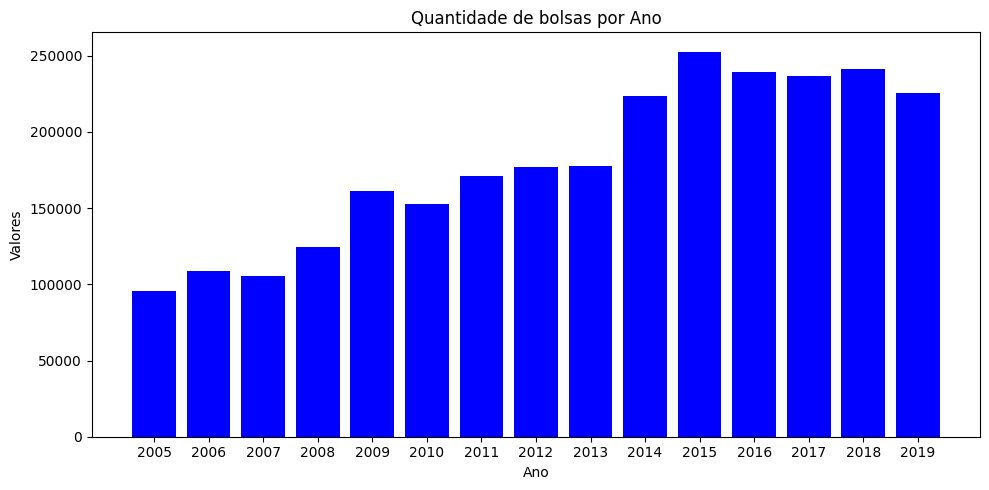

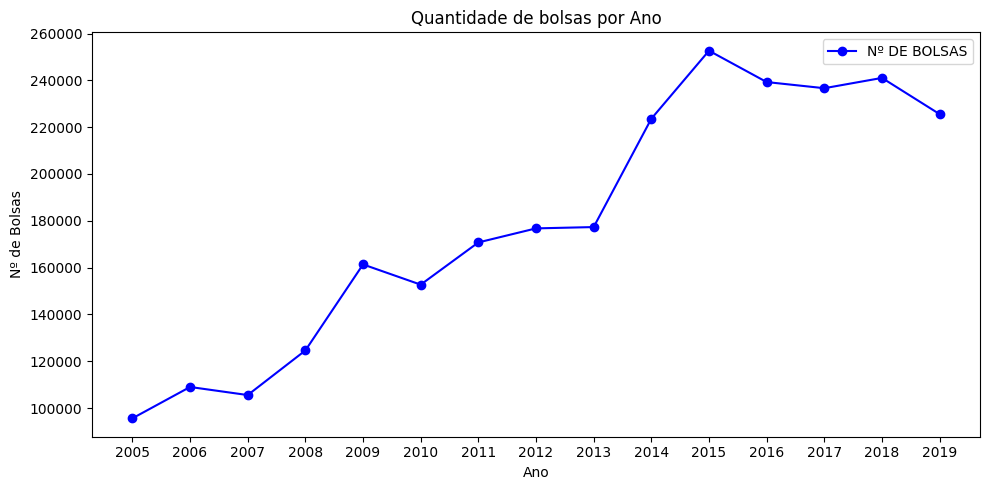

In [9]:
import matplotlib.pyplot as plt

#PLOT BOLSAS POR ANO -> BARRAS
plt.figure(figsize=( 10, 5))
plt.bar(evolucao.index, evolucao.values, color = 'blue')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Quantidade de bolsas por Ano')
plt.xticks(evolucao.index)
plt.grid(False)
plt.tight_layout()

#PLOT BOLSAS POR ANO -> LINHA
plt.figure(figsize=(10, 5))
plt.plot(evolucao.index, evolucao.values, marker = 'o', label = 'Nº DE BOLSAS', color = 'blue')
plt.xlabel('Ano')
plt.ylabel('Nº de Bolsas')
plt.title('Quantidade de bolsas por Ano')
plt.xticks(evolucao.index)
plt.grid(False)
plt.tight_layout()
plt.legend()

#ORGANIZAR GRÁFICOS LADO A LADO
plt.subplots_adjust(wspace=0.4)  # Espaçamento entre os gráficos
plt.show()



A partir destes gráficos foi possível observar:
- O programa saiu de aproximadamente 100.000 bolsas em 2005, para quade 260.000 em 2015. um aumento de 160%
- Chama atenção o salto significativo de bolsas de 2013 até 2015; época conturbada politicamente no país.
- Após atingir seu máximo em 2015, houve uma redução nos anos seguintes, com pequeno aumento em 2018 e nova redução em 2019;

É importante avaliar neste momento que houve mudanças de governo no país entre este período, o que pode ter impactado no andamento do programa, além da crise política e econômica que atinigiu o país principalmente a partir de 2013, culminando no impeachmant da então presidente Dilma em 2016. Neste período, o país teve como presidentes:
- Lula I: 2005-2006;
- Lula II: 2007-2010;
- Dilma I: 2011-2014;
- Dilma II: 2015-2016;
- Temer: 2016-2018;
- Bolsonaro: 2019

Para avaliar visualmente quais os presidentes do período, faremos um gráfico com as linhas de cada um dos presidentes com uma cor.

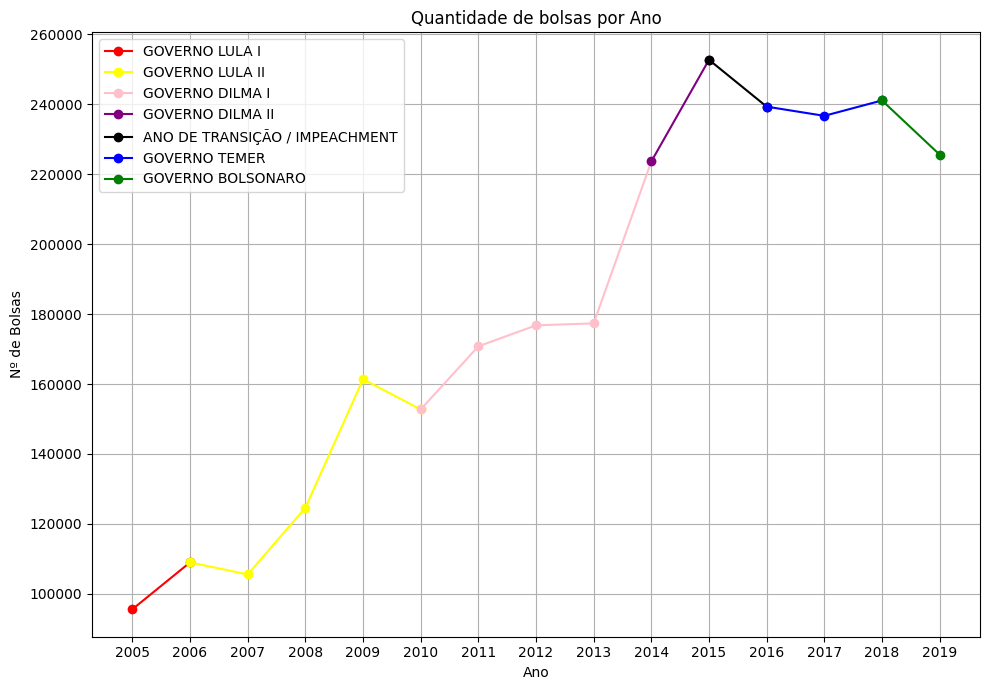

In [10]:
evolucao_lulaI = evolucao.iloc[0:2] 
evolucao_lulaII = evolucao.iloc[1:6]
evolucao_dilmaI = evolucao.iloc[5:10] 
evolucao_dilmaII = evolucao.iloc[9:11] 
evolucao_temer_dilma = evolucao.iloc[10:12] 
evolucao_temer = evolucao.iloc[11:14] 
evolucao_bolsonaro = evolucao.iloc[13:15]

#PLOT BOLSAS POR ANO -> LINHA PRESIDENTE
plt.figure(figsize=(10, 7))
plt.plot(evolucao_lulaI.index, evolucao_lulaI.values, marker = 'o', label = 'GOVERNO LULA I', color = 'red')
plt.plot(evolucao_lulaII.index, evolucao_lulaII.values, marker = 'o', label = 'GOVERNO LULA II', color = 'yellow')
plt.plot(evolucao_dilmaI.index, evolucao_dilmaI.values, marker = 'o', label = 'GOVERNO DILMA I', color = 'pink')
plt.plot(evolucao_dilmaII.index, evolucao_dilmaII.values, marker = 'o', label = 'GOVERNO DILMA II', color = 'purple')
plt.plot(evolucao_temer_dilma.index, evolucao_temer_dilma.values, marker = 'o', label = 'ANO DE TRANSIÇÃO / IMPEACHMENT', color = 'black')
plt.plot(evolucao_temer.index, evolucao_temer.values, marker = 'o', label = 'GOVERNO TEMER', color = 'blue')
plt.plot(evolucao_bolsonaro.index, evolucao_bolsonaro.values, marker = 'o', label = 'GOVERNO BOLSONARO', color = 'green')
plt.xlabel('Ano')
plt.ylabel('Nº de Bolsas')
plt.title('Quantidade de bolsas por Ano')
plt.xticks(evolucao.index)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Neste gráfico, cada nova cor representa o ínicio de um novo governo, isso quer dizer que, por exemplo, o 'marker' de 2006 é o resultado final do ano de 2006 e representa o ínicio de um novo governo (a partir de 2007), sendo assim, o final do governo Dilma I e o inicio do governo II chama mais atenção para o aumento do número de bolsas, e o inicio do governo Bolsonaro chama atenção para uma redução, porém é preciso avaliar os anos seguintes de governo para chegar a esta conclusão. 

Ainda assim, é inegável que o PROUNI aumentou muito sua relevância para a sociedade devido ao aumento do número de bolsas concebidas, que era de 95.629 em 2005 e foi de 225.555 em 2019.

In [11]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

## Análise de Regionalização do  PROUNI

1. Valores Absolutos

regiao
SUDESTE         1289321
SUL              491560
NORDESTE         486819
CENTRO-OESTE     247089
NORTE            177349
DESCONHECIDO        402
Name: count, dtype: int64


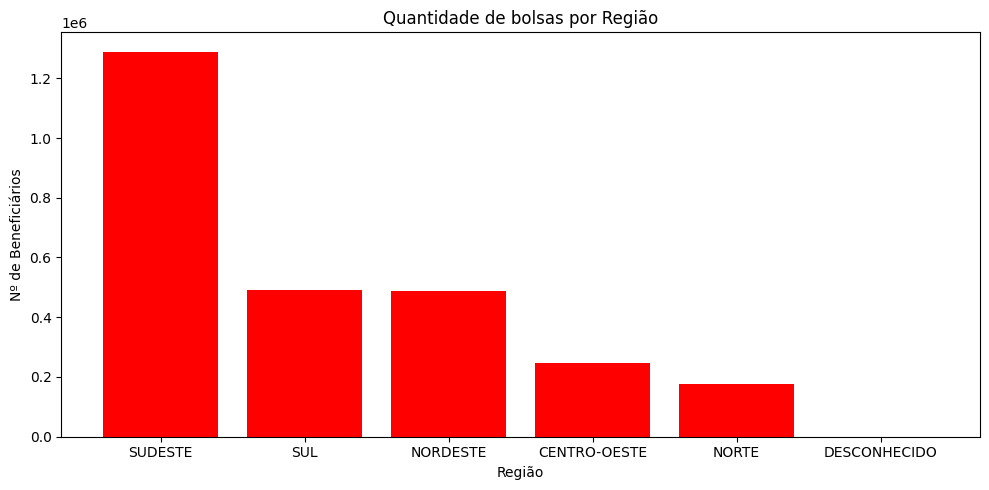

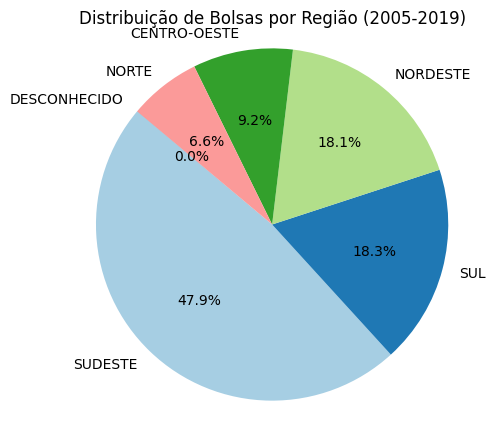

<Figure size 640x480 with 0 Axes>

In [12]:
print(df.regiao.value_counts())

#Criar o gráfico de barras
plt.figure(figsize=( 10, 5))
plt.bar(df.regiao.value_counts().index, df.regiao.value_counts(), color = 'Red')
plt.xlabel('Região')
plt.ylabel('Nº de Beneficiários')
plt.title('Quantidade de bolsas por Região')
plt.xticks(df.regiao.value_counts().index)
plt.grid(False)
plt.tight_layout()

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(df.regiao.value_counts(), labels=df.regiao.value_counts().index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Bolsas por Região (2005-2019)')
plt.axis('equal') 
plt.show()

#ORGANIZAR GRÁFICOS LADO A LADO
plt.subplots_adjust(wspace=0.4)  # Espaçamento entre os gráficos
plt.show()


In [13]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

Vimos aqui que há uma centralização de beneficiários do programa na região Sudeste, vamos ver agora a distribuição populacional, de acordo com o IBGE, a divisão da população brasileira por região segue a seguinte distribuição:
1. Sudeste: 41,78 %,
2. Nordeste: 26,91 %,
3. Sul: 14,74 %,
4. Norte: 8,53 %,
5. Centro-Oeste: 8,02%

Sendo assim, nossa análise mostra que a distribuição do PROUNI favorece as populações residentes da região Sudeste e Sul, e necessita de ampliação principalmente nas regiões Nordeste e Norte. Este resultado pode ser explicado pela quantidade maior de faculdades privadas nas regiões Sul e Sudeste. Por fim vamos analisar o andamento dp número de bolsas em cada região por ano:

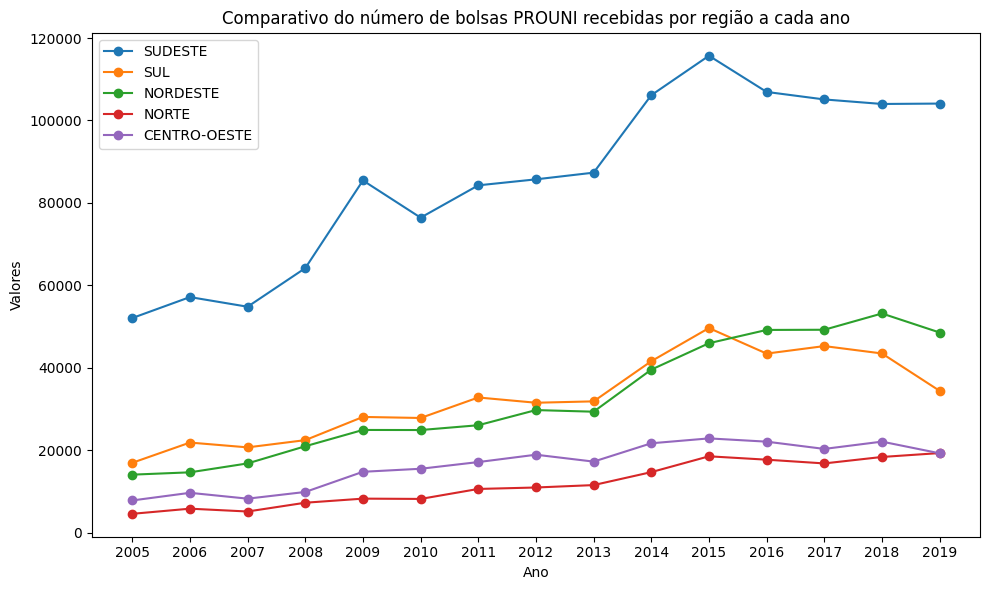

In [14]:
# BOLSAS POR SEXO
reg_ano = df.groupby('regiao')['ano'].value_counts()
reg_ano_sorted = reg_ano.sort_index(level='regiao')
reg_ano_sorted
## PLOT FEM VS MAS
plt.figure(figsize=(10, 6))
plt.plot(reg_ano_sorted.loc['SUDESTE'].index, reg_ano_sorted.loc['SUDESTE'].values, marker = 'o', label = 'SUDESTE')
plt.plot(reg_ano_sorted.loc['SUL'].index, reg_ano_sorted.loc['SUL'].values, marker = 'o', label = 'SUL')
plt.plot(reg_ano_sorted.loc['NORDESTE'].index, reg_ano_sorted.loc['NORDESTE'].values, marker = 'o', label = 'NORDESTE')
plt.plot(reg_ano_sorted.loc['NORTE'].index, reg_ano_sorted.loc['NORTE'].values, marker = 'o', label = 'NORTE')
plt.plot(reg_ano_sorted.loc['CENTRO-OESTE'].index, reg_ano_sorted.loc['CENTRO-OESTE'].values, marker = 'o', label = 'CENTRO-OESTE')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Comparativo do número de bolsas PROUNI recebidas por região a cada ano')
plt.xticks(reg_ano_sorted.loc['SUDESTE'].index)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

Foi possível notar aqui que houve um aumento do quantitativo de beneficiários do Nordeste a partir de 2013 que superou o número de bolsas da região Sul, isto revela que pode ter havido investimentos na região a partir disto para que o program aatingisse sta população. 

Além disso, vimos que a redução de 2019 afetou menos a região Sudeste e Norte do que as demais.

## ANÁLISE DA QUANTIDADE DE BOLSAS POR SEXO
1. Valores Absolutos
2. Por ano

Análise da quantidade de Bolsas distribuídas por Sexo (Valores Absolutos)

In [15]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

sexo_beneficiario
F    1458767
M    1233773
Name: count, dtype: int64


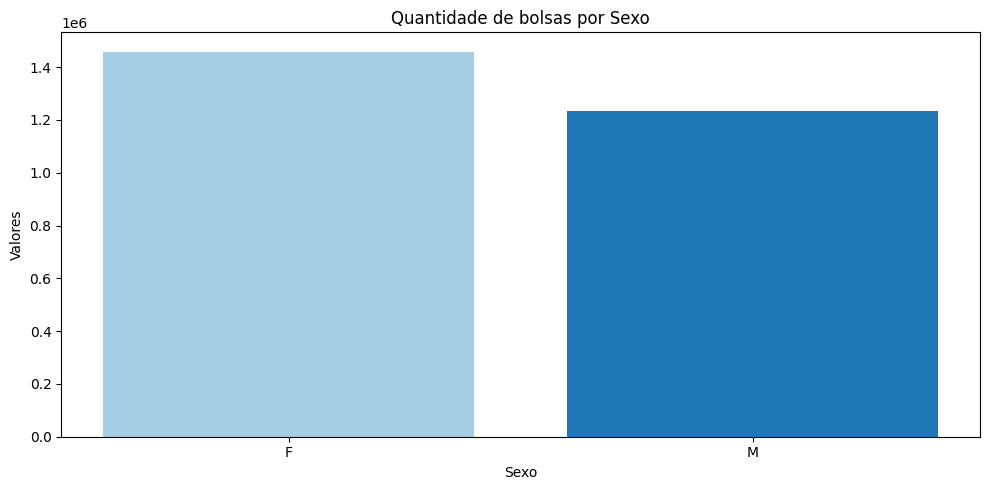

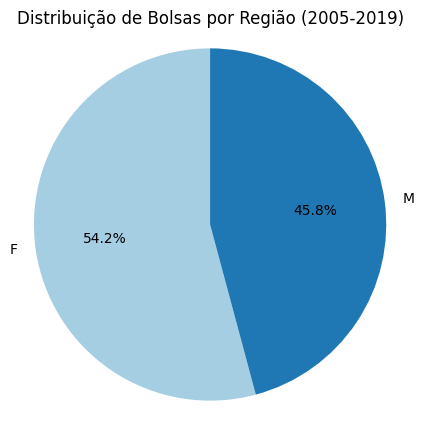

<Figure size 640x480 with 0 Axes>

In [16]:
print(df.sexo_beneficiario.value_counts())

#Criar o gráfico de barras
plt.figure(figsize=( 10, 5))
plt.bar(df.sexo_beneficiario.value_counts().index, df.sexo_beneficiario.value_counts().values, color = plt.cm.Paired.colors)
plt.xlabel('Sexo')
plt.ylabel('Valores')
plt.title('Quantidade de bolsas por Sexo')
plt.xticks(df.sexo_beneficiario.value_counts().index)
plt.grid(False)
plt.tight_layout()

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(df.sexo_beneficiario.value_counts(), labels=df.sexo_beneficiario.value_counts().index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Bolsas por Região (2005-2019)')
plt.axis('equal') 
plt.show()

#ORGANIZAR GRÁFICOS LADO A LADO
plt.subplots_adjust(wspace=0.4)  # Espaçamento entre os gráficos
plt.show()


Análise da distribuição por ano

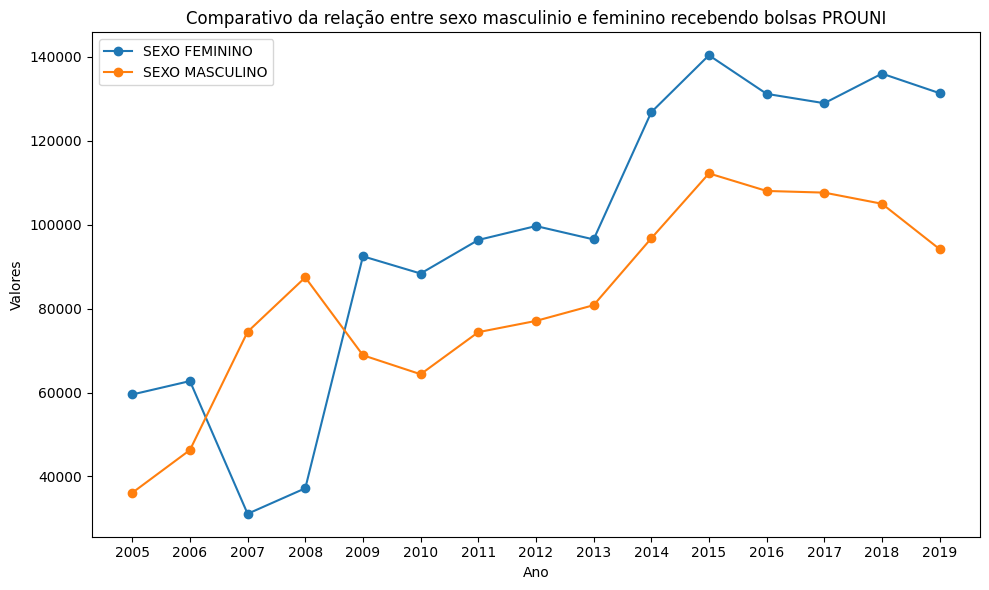

In [17]:
# BOLSAS POR SEXO
ano_sexo = df.groupby('sexo_beneficiario')['ano'].value_counts()
ano_sexo_sorted = ano_sexo.sort_index(level='ano')
ano_sexo_sorted
## PLOT FEM VS MAS
plt.figure(figsize=(10, 6))
plt.plot(ano_sexo_sorted.loc['F'].index, ano_sexo_sorted.loc['F'].values, marker = 'o', label = 'SEXO FEMININO')
plt.plot(ano_sexo_sorted.loc['M'].index, ano_sexo_sorted.loc['M'].values, marker = 'o', label = 'SEXO MASCULINO')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Comparativo da relação entre sexo masculinio e feminino recebendo bolsas PROUNI')
plt.xticks(ano_sexo_sorted.loc['F'].index)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

CONCLUSÕES:

- Há uma maior porcentagem de mulheres beneficiadas pelo programa;
- Foi possível perceber isto na maioria dos ano (Excessões: 2007 e 2008), o que revela que o padrão do brograma é ter mais mulheres beneficiadas do que homens.

In [18]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

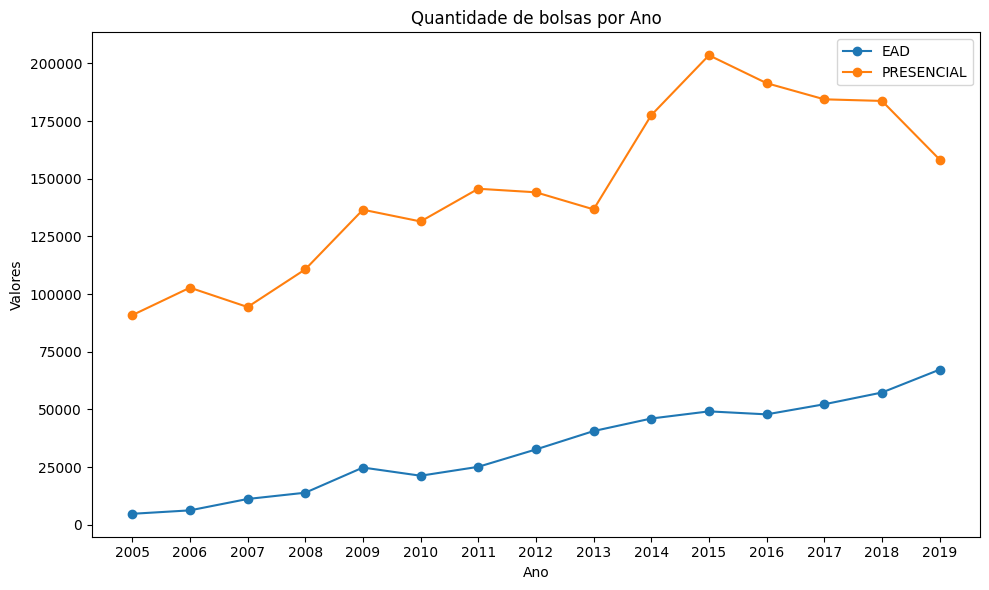

In [19]:
ano_modalidade = df.groupby('modalidade_ensino')['ano'].value_counts()
ano_modalidade_sorted = ano_modalidade.sort_index(level='ano')

#PLOT EAD
plt.figure(figsize=(10, 6))
plt.plot(ano_modalidade_sorted.loc['EAD'].index, ano_modalidade_sorted.loc['EAD'].values, marker = 'o', label = 'EAD')
plt.plot(ano_modalidade_sorted.loc['PRESENCIAL'].index, ano_modalidade_sorted.loc['PRESENCIAL'].values, marker = 'o', label = 'PRESENCIAL')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Quantidade de bolsas por Ano')
plt.xticks(ano_modalidade_sorted.loc['PRESENCIAL'].index)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()


## Análise da quantidade de bolsas por Raça

In [20]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

1. Análise por valores absolutos

raca_beneficiario
Branca           1162938
Parda            1114000
Preta             341831
Amarela            47254
Nao Informada      23639
Indigena            2878
Name: count, dtype: int64


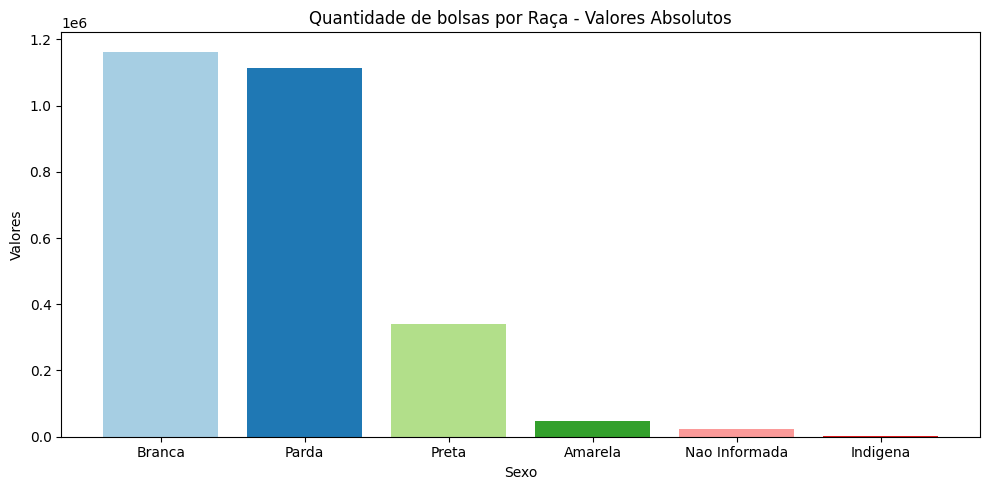

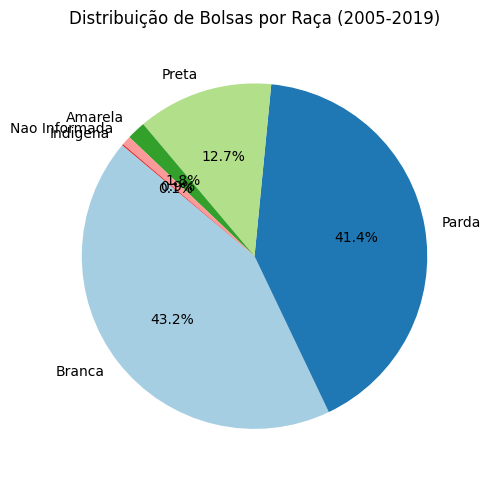

<Figure size 640x480 with 0 Axes>

In [21]:
print(df.raca_beneficiario.value_counts())

#Criar o gráfico de barras
plt.figure(figsize=( 10, 5))
plt.bar(df.raca_beneficiario.value_counts().index, df.raca_beneficiario.value_counts().values, color = plt.cm.Paired.colors)
plt.xlabel('Sexo')
plt.ylabel('Valores')
plt.title('Quantidade de bolsas por Raça - Valores Absolutos')
plt.xticks(df.raca_beneficiario.value_counts().index)
plt.grid(False)
plt.tight_layout()

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(df.raca_beneficiario.value_counts(), labels=df.raca_beneficiario.value_counts().index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Bolsas por Raça (2005-2019)')
plt.axis('equal') 
plt.tight_layout()
plt.show()

#ORGANIZAR GRÁFICOS LADO A LADO
plt.subplots_adjust(wspace=0.4)  # Espaçamento entre os gráficos
plt.show()

Houve, portanto uma predominância entre a população Branca(43.2 %) e Parda(41.4 %) entre os totais dos beneficiados pelo programa. Além disso, é possível ver nesta distribuição o reflexo da política de cotas do programa, tendo em vista a proporção maior de pessoas Pretas, Pardas e Indígenas beneficiadas pelo PROUNI. No entanto, apesar do programa prever bolsas para pessoas Pretas, Pardas e Indígenas, a população Parda é quem mais se beneficia no grupo, sendo a população indígena a menos beneficiada.

2. Análise por ano

[ 25730  36847  35929  43949  59194  57827  65620  73746  75177  96935
 110624 107354 107215 112148 105705]


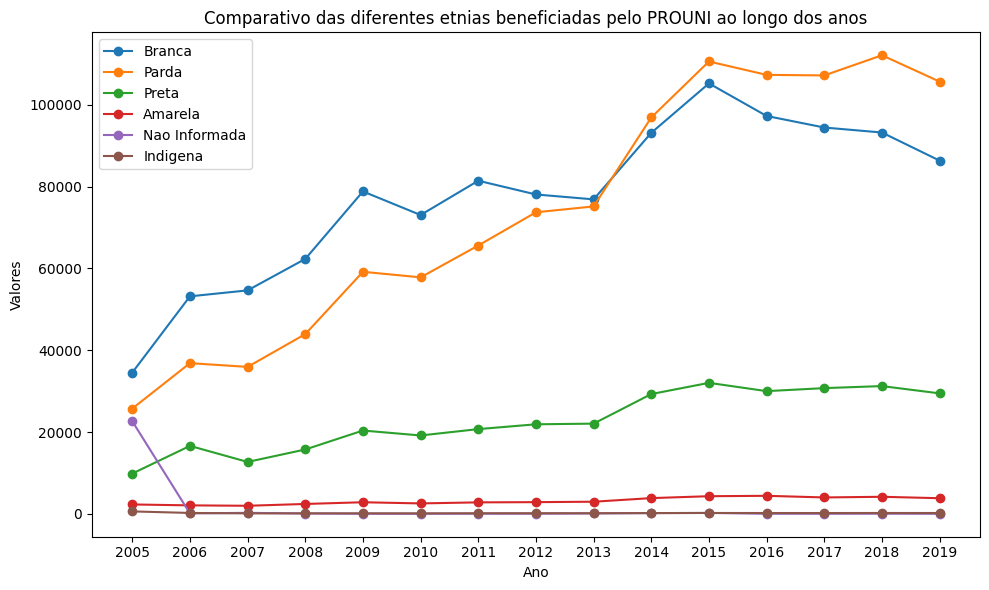

In [22]:
# BOLSAS POR RAÇA 
ano_raca = df.groupby('raca_beneficiario')['ano'].value_counts()
ano_raca_sorted = ano_raca.sort_index(level='ano')
ano_raca_sorted
print(ano_raca_sorted.loc['Parda'].values)

## PLOT FEM VS MAS
plt.figure(figsize=(10, 6))
plt.plot(ano_raca_sorted.loc['Branca'].index, ano_raca_sorted.loc['Branca'].values, marker = 'o', label = 'Branca')
plt.plot(ano_raca_sorted.loc['Parda'].index, ano_raca_sorted.loc['Parda'].values, marker = 'o', label = 'Parda')
plt.plot(ano_raca_sorted.loc['Preta'].index, ano_raca_sorted.loc['Preta'].values, marker = 'o', label = 'Preta')
plt.plot(ano_raca_sorted.loc['Amarela'].index, ano_raca_sorted.loc['Amarela'].values, marker = 'o', label = 'Amarela')
plt.plot(ano_raca_sorted.loc['Nao Informada'].index, ano_raca_sorted.loc['Nao Informada'].values, marker = 'o', label = 'Nao Informada')
plt.plot(ano_raca_sorted.loc['Indigena'].index, ano_raca_sorted.loc['Indigena'].values, marker = 'o', label = 'Indigena')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Comparativo das diferentes etnias beneficiadas pelo PROUNI ao longo dos anos')
plt.xticks(ano_raca_sorted.loc['Branca'].index)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

Nesta análise ano-a-ano, pode-se perceber que a população 'Parda' e 'Branca' segue a tendência de evoluçaõ do programa desde o ano de 2015. No entando, as demais mostraram dificuldades em aumentar o número de beneficiados com o passar dos anos. Isso mostra, por exemplo, uma dificuldade do governo em atingir a população Indígena com o Prouni.

## Análise de bolsas por curso

In [23]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

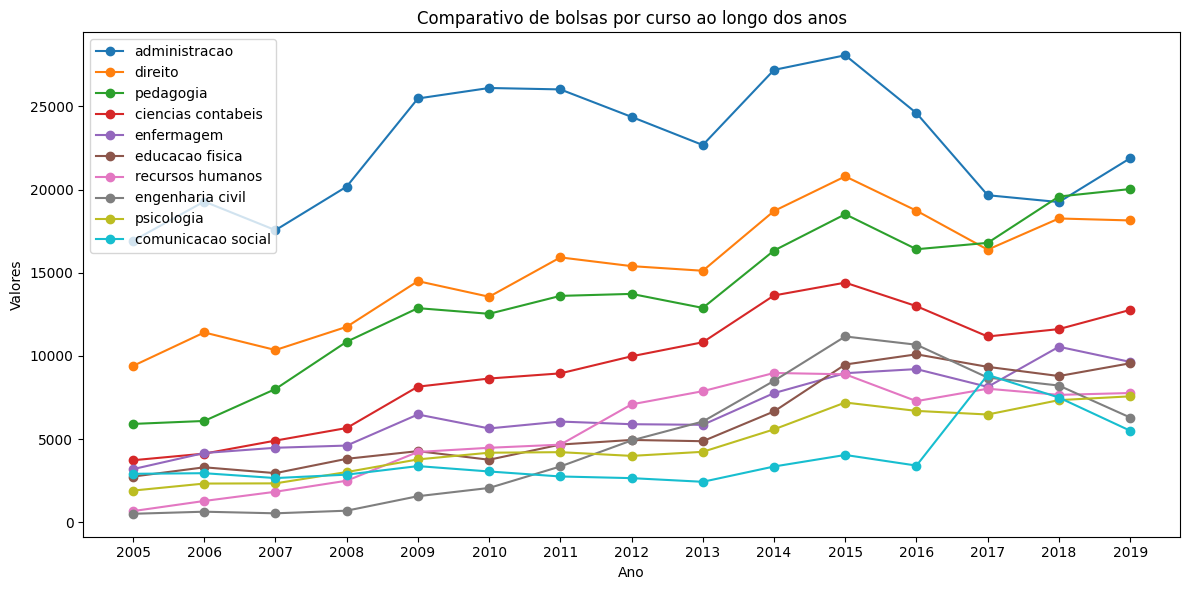

In [24]:
curso_bolsas = df.groupby('curso')['ano'].value_counts()
curso_bolsas_sorted = curso_bolsas.sort_index(level='ano')

cursos_comuns = df['curso'].value_counts().head(10).index

# Plot bolsas por curso ao longo dos anos
plt.figure(figsize=(12, 6))
for curso in cursos_comuns:
    plt.plot(curso_bolsas_sorted.loc[curso].index, curso_bolsas_sorted.loc[curso].values, marker='o', label=curso)

plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Comparativo de bolsas por curso ao longo dos anos')
plt.xticks(curso_bolsas_sorted.loc[cursos_comuns[0]].index)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

É notável que os cursos com a maior quantidade de bolsa com excessão do curso de administração, possuem um tendencia de crescimento

## Análise racial pelo maior grupo de bolsa

<Figure size 1200x800 with 0 Axes>

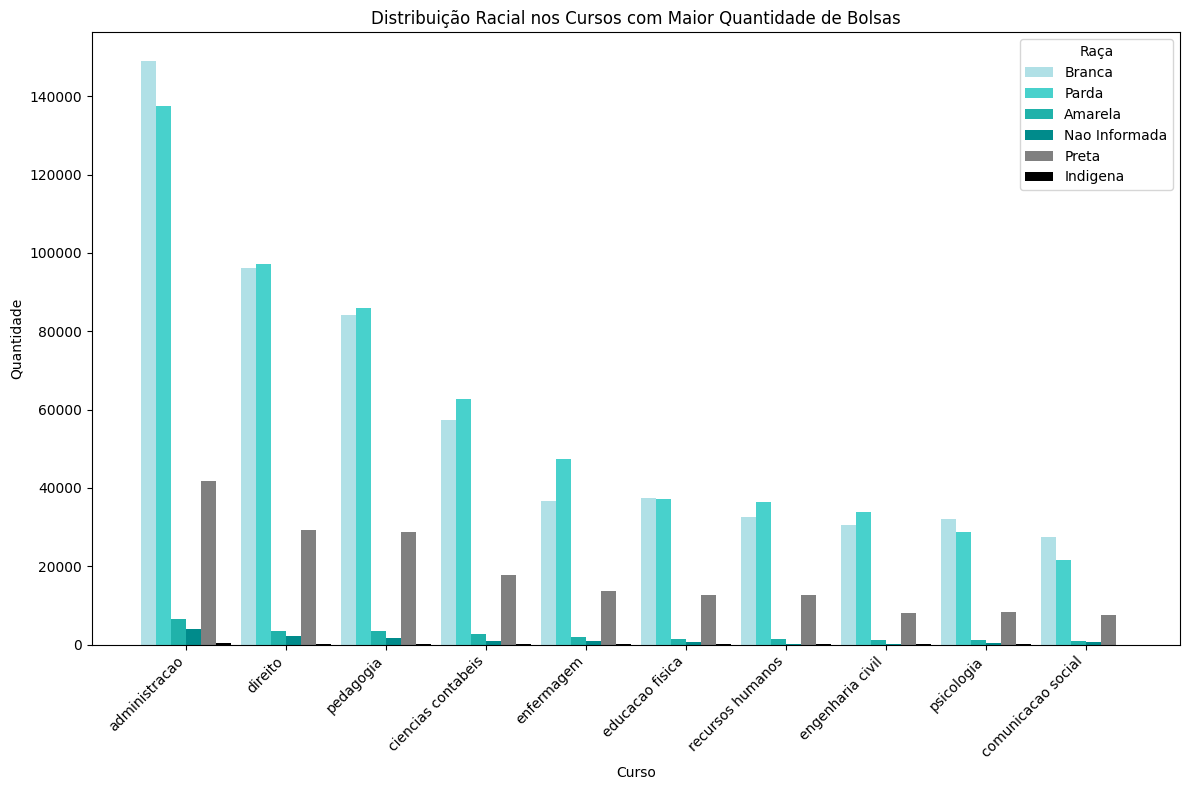

In [25]:
maiores_cursos = df['curso'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
bar_width = 0.15
index = np.arange(len(maiores_cursos))
raca_labels = df['raca_beneficiario'].unique()
cores = ['powderblue', 'mediumturquoise', 'lightseagreen', 'darkcyan', 'Gray', 'black']

fig, ax = plt.subplots(figsize=(12, 8))

for i, raca in enumerate(raca_labels):
    raca_counts = []
    
    for curso in maiores_cursos:
        df_curso = df[df['curso'] == curso]
        raca_count = df_curso[df_curso['raca_beneficiario'] == raca].shape[0]
        raca_counts.append(raca_count)
    ax.bar(index + i * bar_width, raca_counts, bar_width, label=raca, color=cores[i])
ax.set_xlabel('Curso')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição Racial nos Cursos com Maior Quantidade de Bolsas')
ax.set_xticks(index + bar_width * (len(raca_labels) - 1) / 2)
ax.set_xticklabels(maiores_cursos, rotation=45, ha='right')
ax.legend(title='Raça')
plt.tight_layout()
plt.show()

Estes são os cursos com maior quantidade de bolsas, e é notável a presença de açoes afirmativas, visto as maiores concentrações de pessoas nesses cursos são pardas ou pretas.

## Análise da quantidade de bolsas por ano

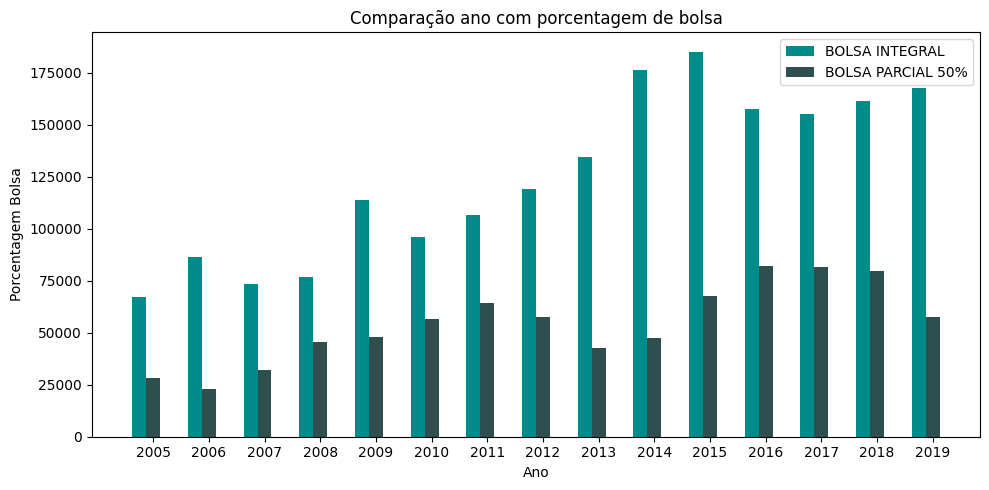

In [26]:
# Criar um DataFrame auxiliar para contar as ocorrências de cada parâmetro por ano
count_df = df.groupby(['ano', 'tipo_bolsa']).size().unstack(fill_value=0)

# Plotar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 5))

# Definir a largura das barras agrupadas
bar_width = 0.25

# Definir os índices para a posição das barras
index = count_df.index

# Plotar as barras para cada parâmetro
ax.bar(index - bar_width, count_df['BOLSA INTEGRAL'], width=bar_width, label='BOLSA INTEGRAL', color='DarkCyan')
ax.bar(index, count_df['BOLSA PARCIAL 50%'], width=bar_width, label='BOLSA PARCIAL 50%', color='DarkSlateGray')

# Configurar os rótulos do eixo X, Y e o título
ax.set_xlabel('Ano')
ax.set_ylabel('Porcentagem Bolsa')
ax.set_title('Comparação ano com porcentagem de bolsa')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

## Análise de bolsas por raça

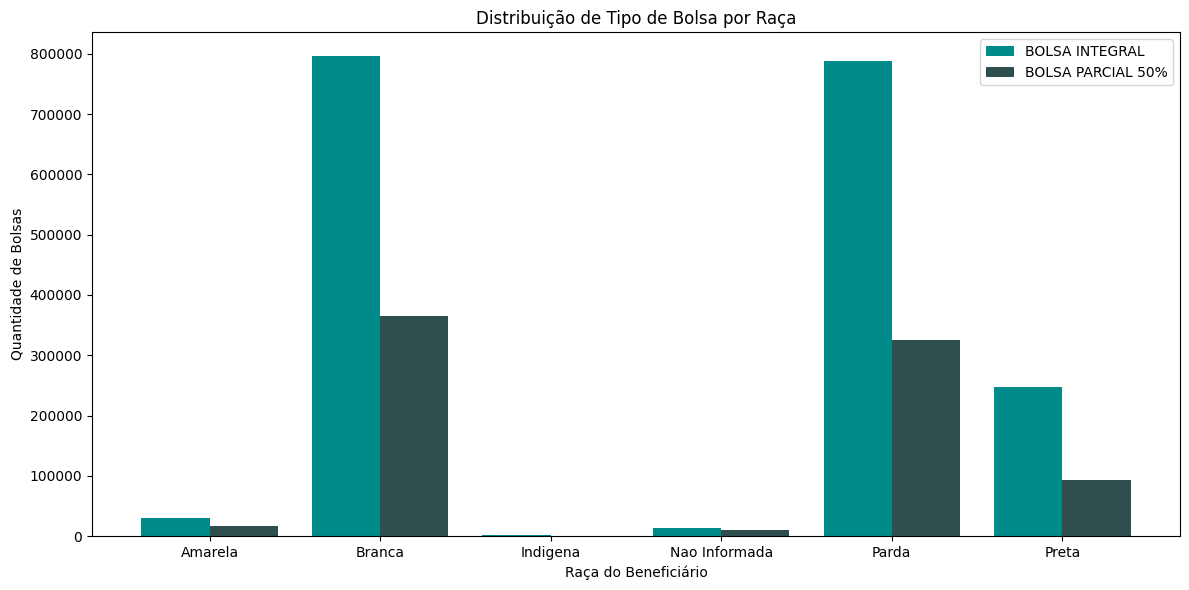

In [28]:
count_df = df.groupby(['raca_beneficiario', 'tipo_bolsa']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(count_df.index))

ax.bar(index - bar_width/2, count_df['BOLSA INTEGRAL'], width=bar_width, label='BOLSA INTEGRAL', color='DarkCyan')
ax.bar(index + bar_width/2, count_df['BOLSA PARCIAL 50%'], width=bar_width, label='BOLSA PARCIAL 50%', color='DarkSlateGray')

ax.set_xlabel('Raça do Beneficiário')
ax.set_ylabel('Quantidade de Bolsas')
ax.set_title('Distribuição de Tipo de Bolsa por Raça')
ax.set_xticks(index)
ax.set_xticklabels(count_df.index)
ax.legend()

plt.tight_layout()
plt.show()

## Quantidade de bolsas por universidade

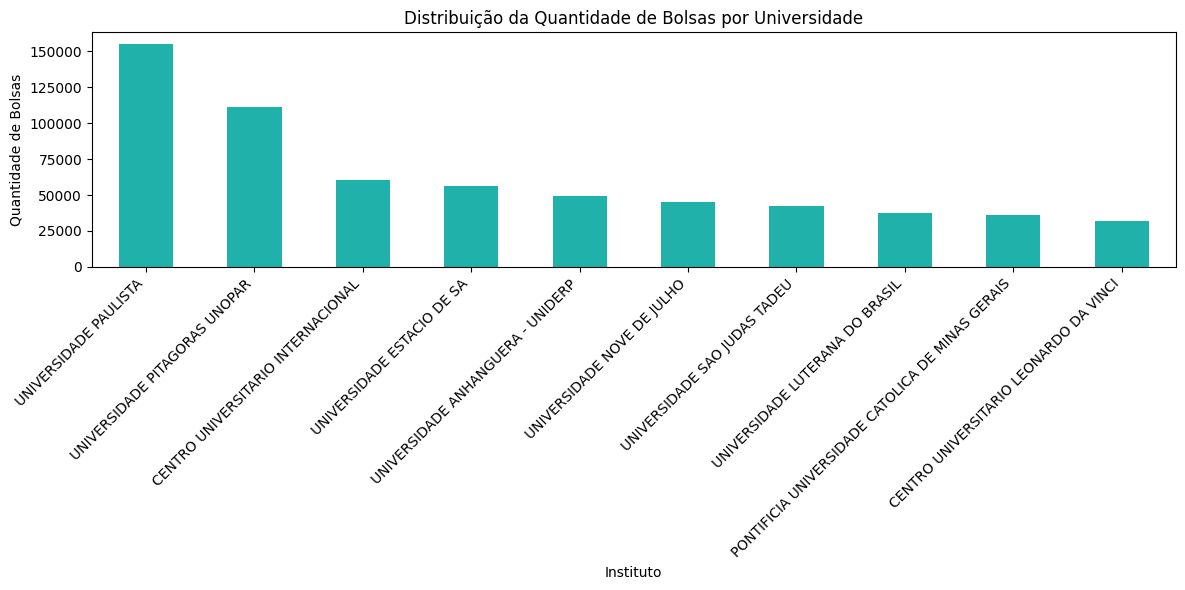

In [29]:
# Contar a quantidade de bolsas por instituto
instituto_counts = df['universidade'].value_counts().head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
instituto_counts.plot(kind='bar', color='lightseagreen')
plt.xlabel('Instituto')
plt.ylabel('Quantidade de Bolsas')
plt.title('Distribuição da Quantidade de Bolsas por Universidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Quantidade de bolsas por estado

In [30]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

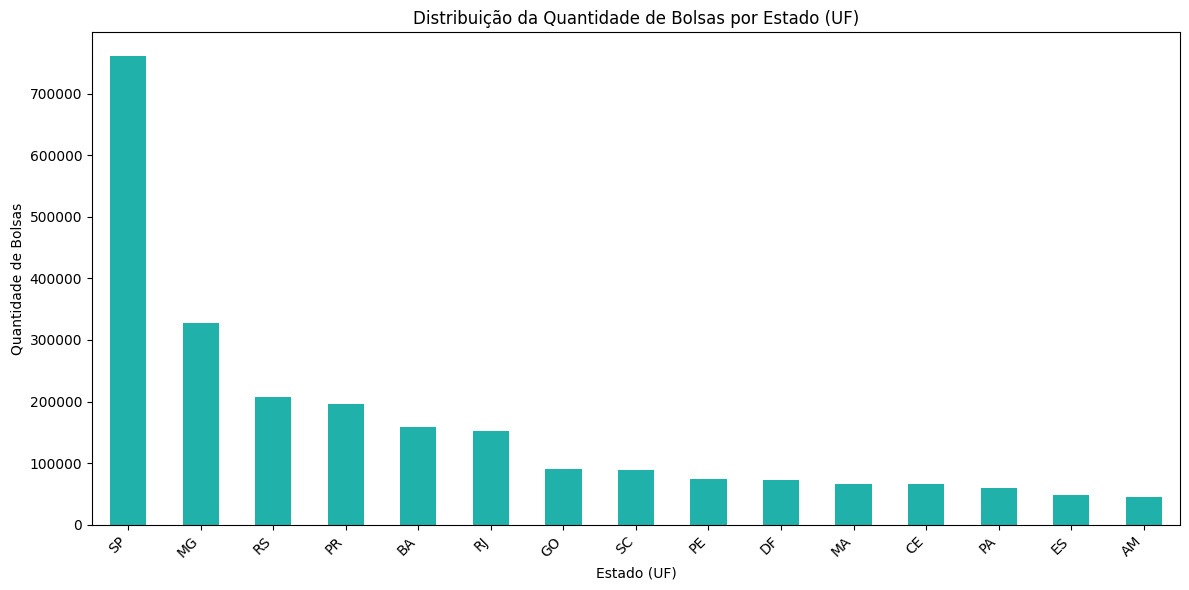

In [31]:
# Contar a quantidade de bolsas por estado (UF)
uf_counts = df['sigla_uf'].value_counts().head(15)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
uf_counts.plot(kind='bar', color='lightseagreen')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade de Bolsas')
plt.title('Distribuição da Quantidade de Bolsas por Estado (UF)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Análise de bolsas por estado

### Código de georeferenciamento

In [ ]:
#shp_ibge = gpd.read_file('../utils/BR_Setores_2021/BR_Setores_2021.shp')
#gpkg_ibge = 'utils/BR_Setores_2021_gpkg/BR_Setores_2021.gpkg'
#shp_ibge.to_file(gpkg_ibge, driver='GPKG')

In [ ]:
brasil = gpd.read_file('../utils/BR_Setores_2021_gpkg/BR_Setores_2021.gpkg')
brasil.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9..."
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9..."
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9..."
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9..."
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9..."


In [ ]:
relacao_estado = df.groupby('sigla_uf', as_index= False).agg(count = ('sigla_uf', 'count'))
relacao_estado.sort_values(by='count', inplace = True)
relacao_estado.head()

,sigla_uf,count
6,DESCONHECIDO,402
22,RR,5553
3,AP,9561
0,AC,11292
27,TO,14416


In [ ]:
df_new = brasil.merge(relacao_estado, left_on='SIGLA_UF', right_on='sigla_uf')

print(f'type: {type(df_new)}')
df_new.head()

type: <class 'geopandas.geodataframe.GeoDataFrame'>


,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry,sigla_uf,count
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9...",RO,31138
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9...",RO,31138
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9...",RO,31138
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9...",RO,31138
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9...",RO,31138


In [ ]:
colors = ['#FFFF99', '#009900', '#003366']
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=20)

### Gráfico

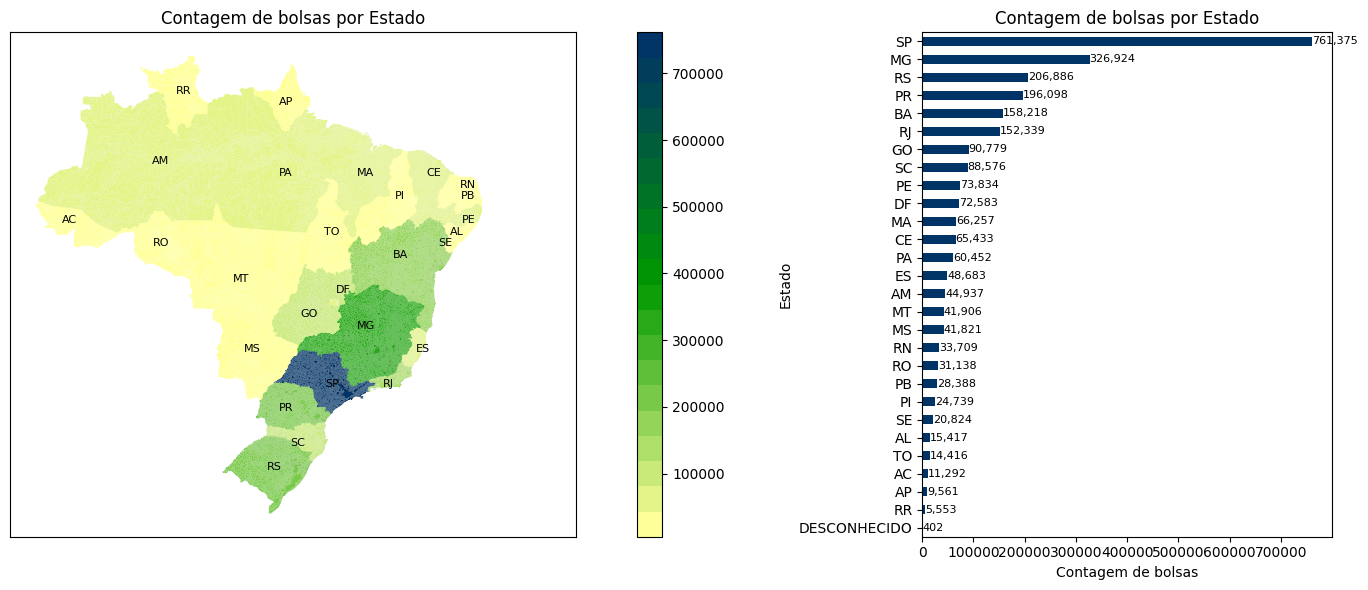

: 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = df_new.plot(column='count',  cmap=cmap, legend=True, ax=axes[0])
ax1.set_title('Contagem de bolsas por Estado')
state_coordinates = {'AC': (-71, -9),'AL': (-37, -10),'AP': (-52, 1),'AM': (-63, -4),'BA': (-42, -12),'CE': (-39, -5),'DF': (-47, -15),'ES': (-40, -20),'GO': (-50, -17),'MA': (-45, -5),'MT': (-56, -14),'MS': (-55, -20),'MG': (-45, -18),'PA': (-52, -5),'PB': (-36, -7),'PR': (-52, -25),'PE': (-36, -9),'PI': (-42, -7),'RJ': (-43, -23),'RN': (-36, -6),'RS': (-53, -30),'RO': (-63, -11),'RR': (-61, 2),'SC': (-51, -28),'SP': (-48, -23),'SE': (-38, -11),'TO': (-48, -10)}

for state, (x, y) in state_coordinates.items():
    ax1.annotate(state, xy=(x, y), xytext=(0, 0), textcoords="offset points",
                 ha='center', fontsize=8, color='black')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = relacao_estado.plot.barh(x='sigla_uf', y='count', legend = False, ax=axes[1], color = '#003366')
ax2.set_xlabel('Contagem de bolsas')
ax2.set_ylabel('Estado')
ax2.set_title('Contagem de bolsas por Estado')

# Adicionar os valores acima das barras
for idx, value in enumerate(relacao_estado['count']):
    ax2.text(value, idx, f'{value:,}', va='center', fontsize=8)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()

Crescimento Substancial das Bolsas Oferecidas: Ao longo do intervalo de 2005 a 2019, observou-se um notável aumento na quantidade de bolsas concedidas através do PROUNI. Inicialmente, com cerca de 100.000 bolsas em 2005, o programa expandiu significativamente, chegando a aproximadamente 260.000 bolsas em 2015. Esse aumento de aproximadamente 160% reflete a crescente importância e alcance do programa ao longo desses anos.

Impacto das Mudanças Políticas na Distribuição das Bolsas: A análise das concessões de bolsas por ano revelou uma associação clara entre as mudanças de governo e a distribuição das bolsas. Notam-se picos de concessões em momentos de transições políticas, como nas administrações de Dilma Rousseff e Jair Bolsonaro. As quedas subsequentes podem ser ligadas a fatores políticos e econômicos do período.

Desigualdade na Distribuição Geográfica: Uma disparidade significativa na distribuição de beneficiários do PROUNI é evidenciada pela análise geográfica. As regiões Sudeste e Sul do Brasil concentram a maioria das bolsas, enquanto as regiões Nordeste e Norte têm proporções mais baixas de bolsas em relação à população. Esse padrão destaca a necessidade de uma ampliação direcionada a regiões menos favorecidas.

Promoção da Igualdade de Gênero: O programa PROUNI demonstrou um impacto positivo na promoção da igualdade de gênero no acesso ao ensino superior. Ao longo dos anos analisados, houve uma maior representação de mulheres beneficiadas em comparação aos homens. Esse padrão reforça o papel do programa em fortalecer o acesso equitativo às oportunidades educacionais.

Diversidade Racial e Efeito das Políticas de Cotas: A análise das origens raciais dos beneficiários revela uma predominância de populações Branca e Parda entre os contemplados. A presença de políticas de cotas para pessoas Pretas, Pardas e Indígenas é refletida na maior representatividade desses grupos em relação à população em geral. Esse fenômeno ressalta o impacto positivo dessas políticas em direção à inclusão.

Variações nas Preferências de Cursos e Perfil: A análise por curso mostra variações consideráveis na distribuição de bolsas entre os cursos mais frequentes. Isso possivelmente reflete a demanda e as perspectivas de emprego em diferentes áreas. A adaptação do programa para atender a essas variações pode otimizar ainda mais seu impacto na sociedade.

Esses insights destacam a relevância e o impacto do PROUNI na educação superior no Brasil, ao mesmo tempo em que apontam para áreas de aprimoramento. O programa desempenha um papel fundamental na democratização do acesso ao ensino superior, embora ainda haja desafios a serem enfrentados para garantir uma distribuição justa e inclusiva das oportunidades educacionais em todo o país.